# <div style="text-align: center; color: black;"> 机器学习小组大作业 </div>

* 合肥工业大学宣城校区 计算机科学与技术22-4班 第1小组<br><br>
* 说明：我们选取了kaggle平台上有关蘑菇是否可以食用的数据集，该数据集共有五万多条数据。以下是我们会经历的主要步骤<br>
  一、数据集处理<br>
  1、观察数据集<br>
  .<br>
  .<br>
  .<br>
  后面再补充<br>
对该数据集进行分类并可视化。<br>
数据集网址：https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data

# 设置

<span style="font-size:16px;">
    首先，导入一些常用模块并测试一下这个notebook在配置的conda环境中是否可以正常工作。
</span>

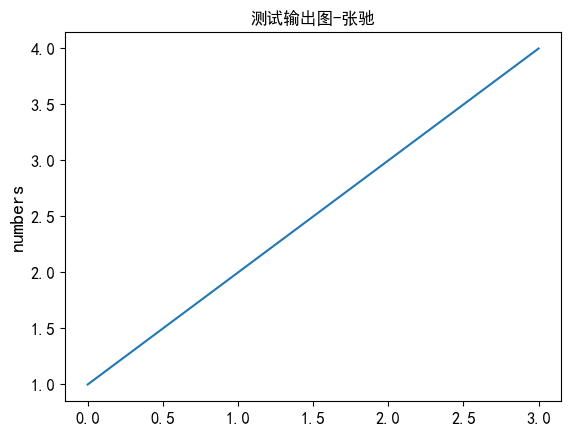

测试代码运行正常！


In [1]:
# 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
import tensorflow
import torch
import warnings
from sklearn.model_selection import StratifiedShuffleSplit

# 设置matplotlib字体，让matplotlib可以显示中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 设置随机种子以保证结果的一致性
np.random.seed(42)

# 设置matplotlib参数
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

# 忽略无用的警告
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 画图测试
plt.plot([1, 2, 3, 4])
plt.ylabel('numbers')
plt.title("测试输出图-张驰")
plt.show()

print("测试代码运行正常！")

## 第一部分：数据集处理

以下内容先对 https://www.kaggle.com/code/ajeetsingh123/mushroom-classification-acc-99-multiple-algos 进行复现，后续改动不影响后面的代码。

### 1、读取数据集

<span style="font-size:16px;">
    通过pandas读入数据集
</span>

In [2]:
data = pd.read_csv(r'./mushroom_cleaned.csv')
df = pd.DataFrame(data)
df.head()
print("数据集正常读入")

数据集正常读入


### 2、对数据集进行分析

<font size="4">（1）通过info（）方法获取数据集的简单描述。如总行数，每个属性的类型和非空值的数量。</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


<span style="font-size:16px;">
    通过df.info()输出可知，该数据共有54035行、9列数据。同时，每一列的非空数据量都为54035，等于总行数，表明这个数据集没有空缺数据。
</span>

<font size="4">（2）通过describe()方法查看数据集的属性摘要</font>

In [4]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


<span style="font-size:16px;">
    这里可以看出数据集的一些基本信息，比如cap-diameter的最大值和75%相差过大，可能存在部分数据异常的情况，后续需要重点分析
</span>

<font size="4">（3）根据kaggle上的数据集介绍信息，统计并对比可食用蘑菇和不可食用蘑菇数据量</font>

通过网站中数据集作者对数据集的介绍可知，“class”表示蘑菇是否可食用。<br>
![图1 kaggle网站上作者对数据集的介绍](images/img1.png)<br>

<span style="font-size:16px;">
    下面对可食用和不可食用的蘑菇数据量进行统计分析，看看二者数据量是否相差过大，如果相差过大则需要对过多一方的数据进行适当删除，避免因数据不平衡导致模型预测时有偏向。
</span>

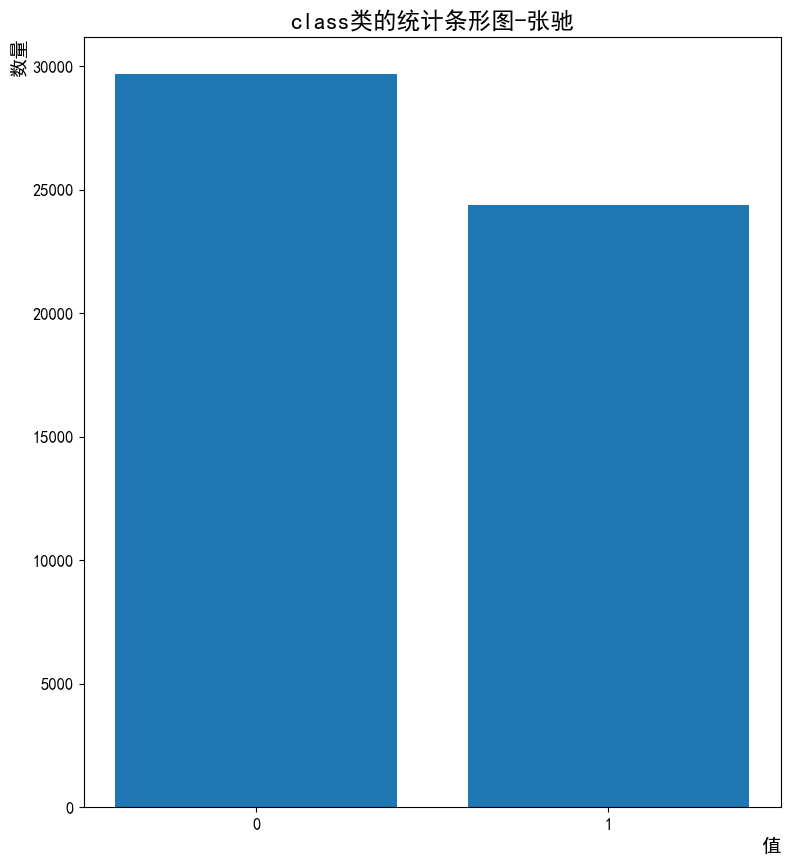

In [5]:
fig, ax = plt.subplots(figsize=(9, 10))

x = [0,1]
y_T = df['class'].value_counts()
y = [y_T[1],y_T[0]]
ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(x)

ax.set_xlabel("值", loc='right', color='black', fontsize=14)
ax.set_ylabel("数量", loc='top', color='black', fontsize=14)
ax.set_title("class类的统计条形图-张驰", fontsize=17)

plt.show()

<span style="font-size:16px;">
    通过条形计数图可以看出，可食用蘑菇和不可食用蘑菇数据量相差不大，数据集较为平衡，不需要对数据集进行删减处理。
</span>

<font size='4'>（4）对数据集中的其他八个特征量进行分析</font>

<span style="font-size:16px;">
    我们也可以使用seaborn绘制直方图。保持kde=True以绘制密度和直方图
</span>

<p style="font-size:18px; font-family:Courier New;">
    ①使用直方图进行分析
</p>

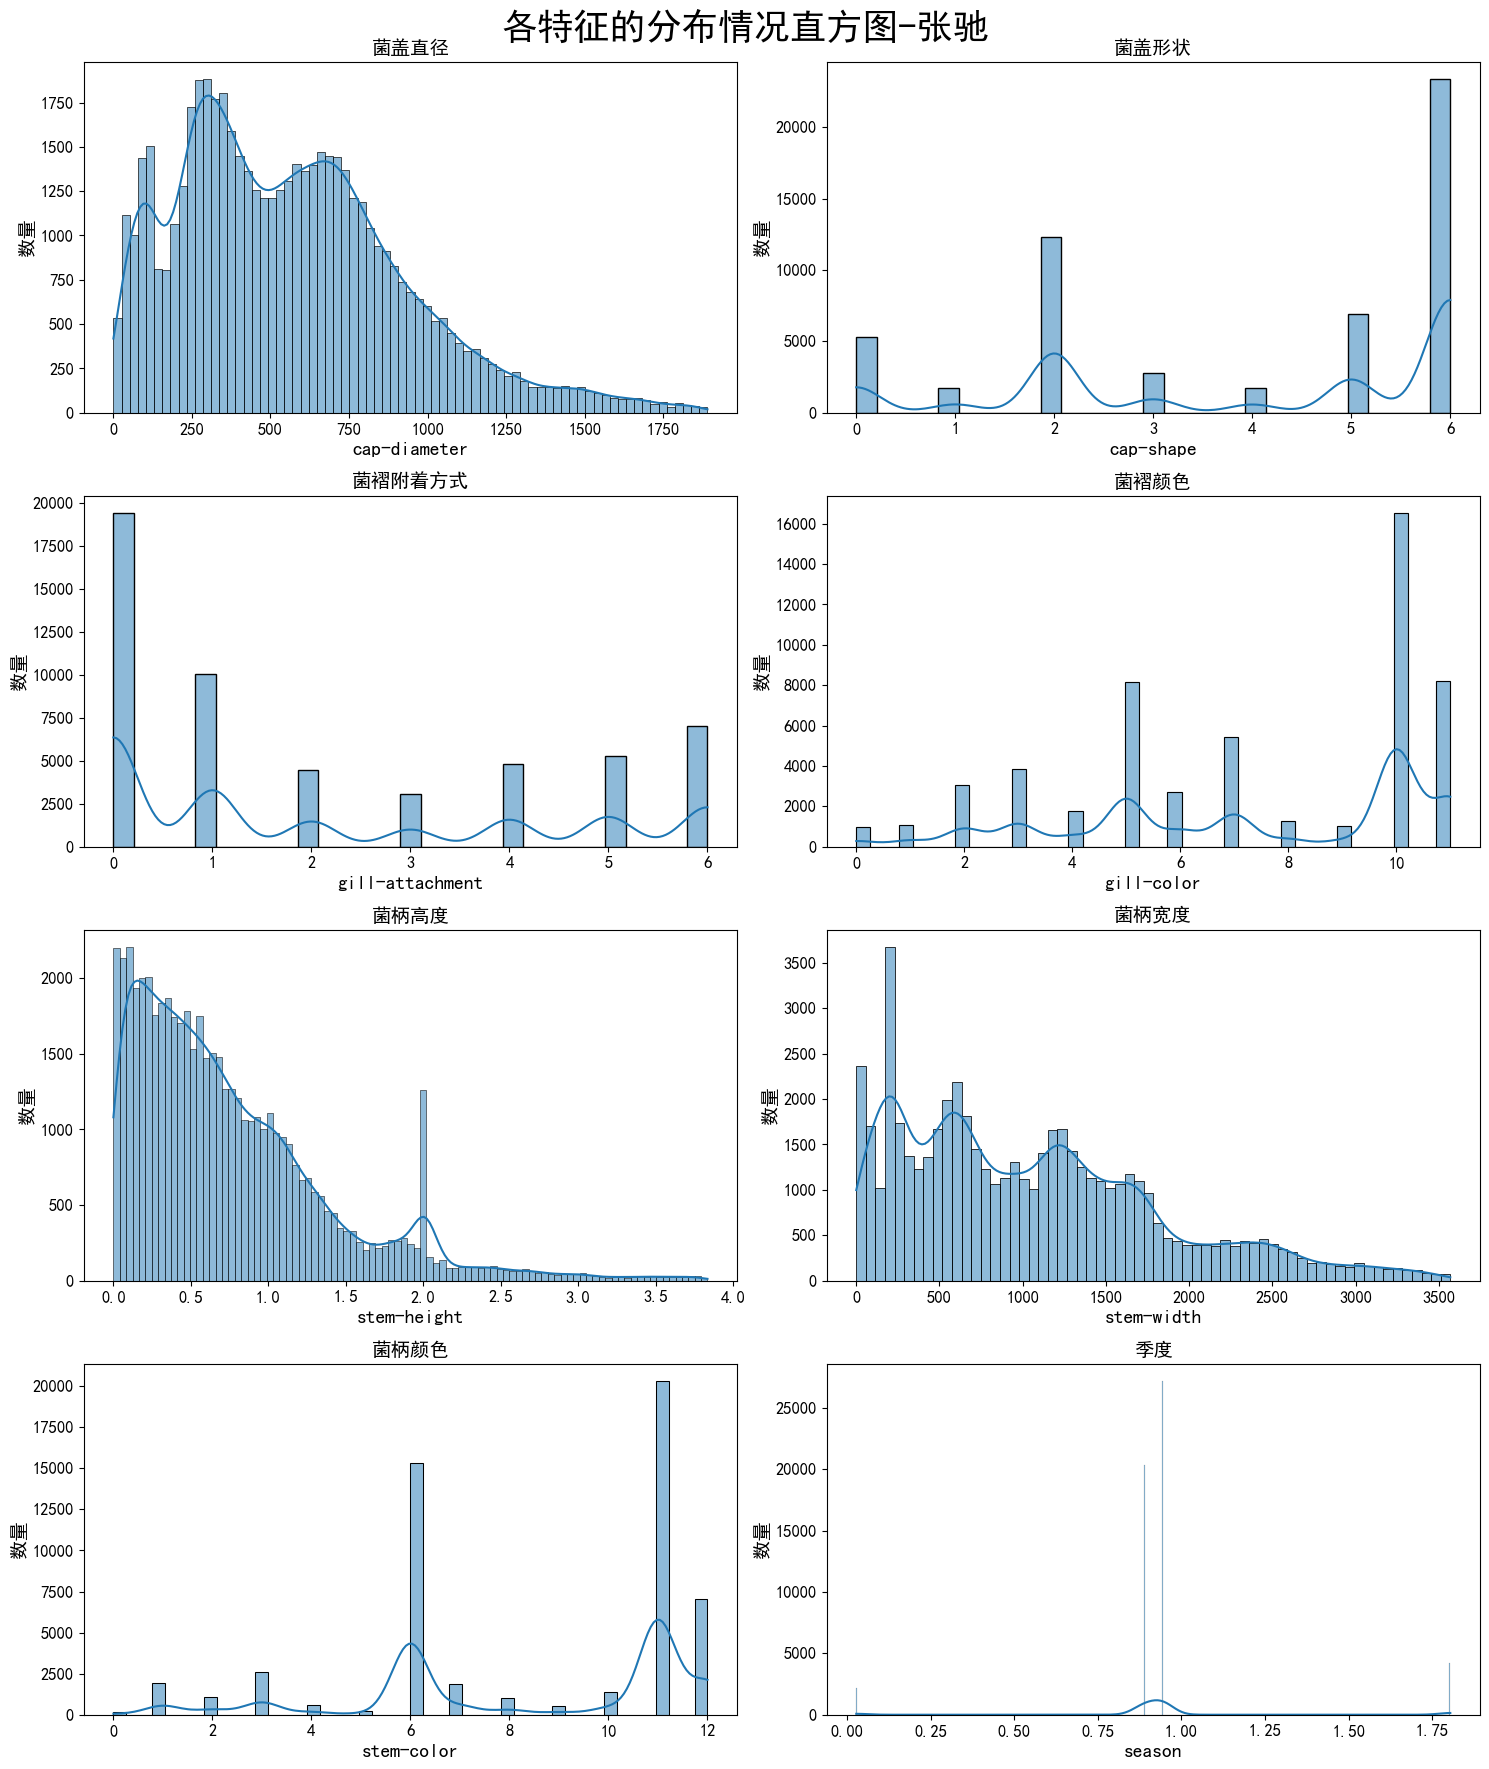

In [6]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
column_name = ['菌盖直径','菌盖形状','菌褶附着方式','菌褶颜色','菌柄高度','菌柄宽度','菌柄颜色','季度']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)  
    axs[i].set_title(column_name[i], fontsize=14, loc='center')  # 设置子图标题
    axs[i].set_ylabel('数量')  # 设置y轴标签
    

plt.suptitle("各特征的分布情况直方图-张驰", fontsize=26)
plt.tight_layout()  
plt.show()

<div style="font-size:16px; line-height:1.5">
观察直方图，有以下发现：<br>
<ul>
<li>首先，这个数据集包含了蘑菇的各种特征，包括菌盖直径、菌盖形状、菌褶附着方式、菌褶颜色、菌柄高度、菌柄宽度、菌柄颜色和季度等。这些特征中，菌盖直径、菌柄高度、菌柄宽度和季度是连续的数值，通过直方图和我们对现实情况的认识，这些连续数据的x轴数据应该分别为：长度、高度、宽度、生长时间；而菌盖形状、菌褶附着方式、菌褶颜色和菌柄颜色则有明显的离散特征，是离散的数据，他们应该是数据集制作时定义的不同类别的信息。通过前面的分析我们知道，我们的目标是预测蘑菇是否可以食用。对于类别这样的离散数据特征，因为大自然中不同蘑菇品种的差别，出现蘑菇的某一特征的某个类别多余其他类别属于正常现象，所以不作为异常数据进行额外处理。下面对菌盖直径、菌柄高度、菌柄宽度和季度这些连续数据进行分析。<br>
<li>对于菌盖直径这个特征，我们尝试将毫米这个单位代入数据，但是这样最大的蘑菇直径超过了1.5米，显然不符合实际。通过在kaggle上原数据集网页中提供的网址可以知道这份数据来自加利福尼亚大学尔湾分校，所以我们尝试代入美国使用的长度单位，最终认为point这个单位比较符合，1point = 0.3528mm，1500point=529.2mm=52.92cm，这个大小差不多是自然界中最大的蘑菇巨型牛肝菌能够达到的大小。而超过1500的数据则过于异常，不太符合实际，通过直方图可以看到这一部分数据非常少，保留这一份数据可能会对模型造成一些负面的影响，因此我们决定删除这一部分数据。<br>
<li>对于菌柄高度这个数据，代入单位dm可以比较适应自然界的真实情况，所以我们认为这一部分数据并不存在太大的问题。但是我们也可以通过直方图看到在“2”这个地方蘑菇的数量远远大于周围其他蘑菇的数量，但是根据自然规律这个直方图应该保持下降的趋势，当前的情况可能导致模型在2dm处过拟合，所以我们考虑减少一部分2dm附近的数据。<br>
<li>对于菌柄宽度这个数据，我们代入μm这个单位可以比较好的适应自然情况，所以不做额外处理。<br>
<li>对于季度这个数据，我们认为他表示蘑菇的生长时长，单位为季度，通过直方图可以看出，绝大多数蘑菇的生长时间在一个季度左右，这符合自然规律，所以不对其做额外处理。
</ul>
</div>

<p style="font-size:18px; font-family:Courier New;">
    ②绘制相关矩阵进行分析
</p>

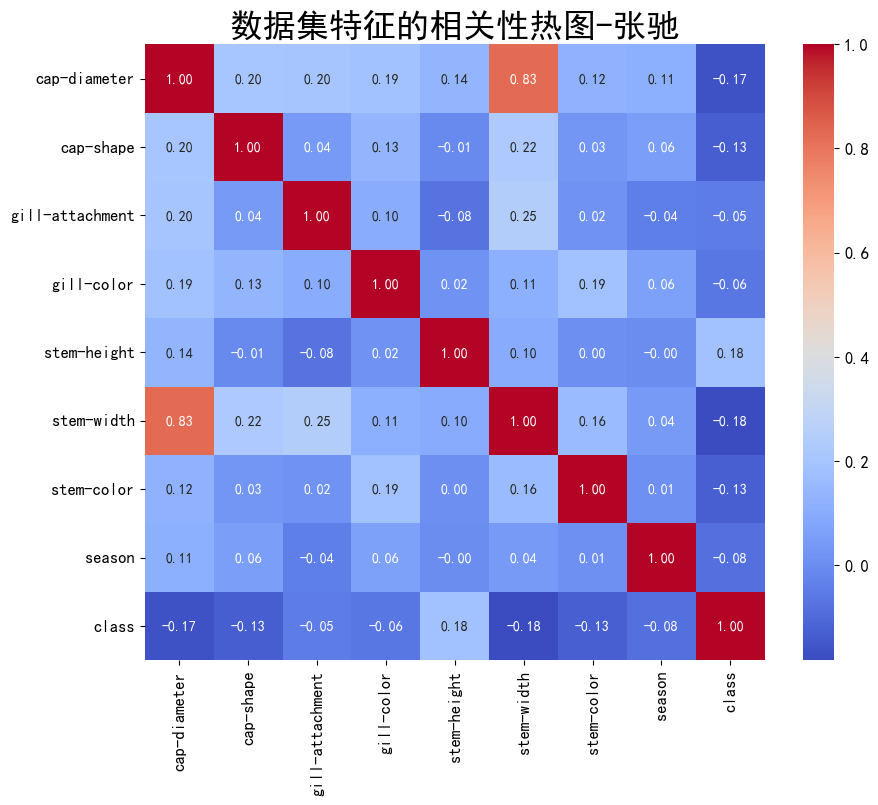

In [7]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('数据集特征的相关性热图-张驰', fontsize = 24)
plt.show()

<div style="font-size:16px; line-height:1.5">
    通过观察相关性矩阵的热力图，我们可以发现，数据集中的特征之间的相关性总体上较低，这意味着每个特征都能为模型提供独立的信息。虽然蘑菇的菌盖直径和菌柄宽度的相关性较高，但考虑到整个数据集的特征数量并不多，且二者正相关符合自然规律，保留这两个特征可以为模型提供更丰富的信息，因此，我们决定保留所有特征进行模型训练。
</div>

### 3、基于上面的分析对数据集进行处理

<p style="font-size:18px; font-family:Courier New;">
    ①按照上面的数据分析，先删除所有菌盖直径大于1500的数据。
</p>

In [8]:
# 删除大于1500的数据
df = df[df['cap-diameter'] <= 1500]

<div style="font-size:16px; line-height:1.5">
    打印直方图检查是否成功删除
</div>

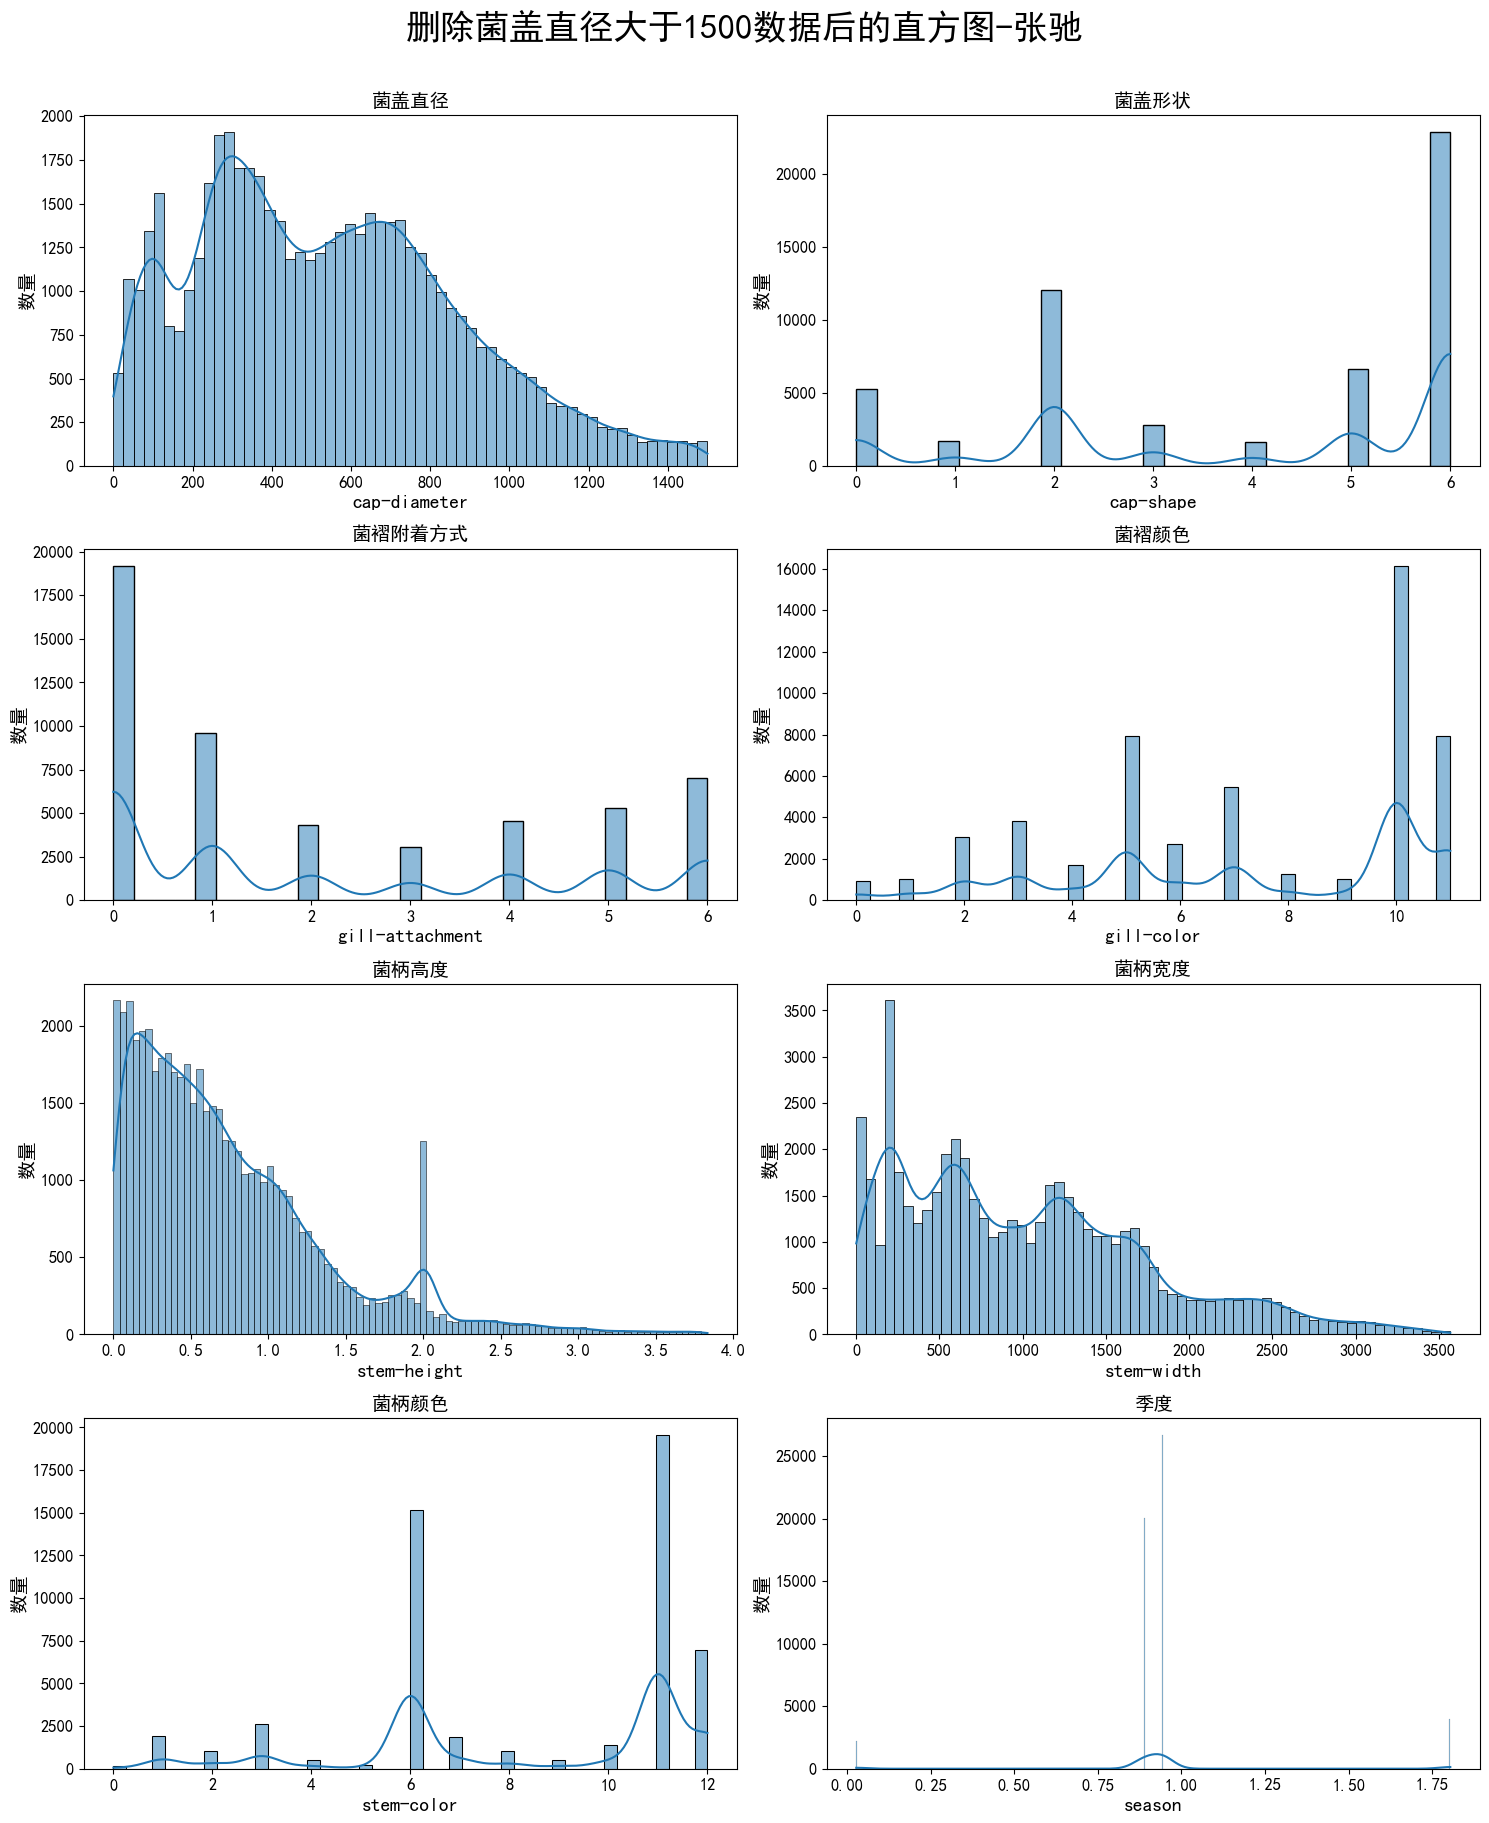

In [9]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
column_name = ['菌盖直径','菌盖形状','菌褶附着方式','菌褶颜色','菌柄高度','菌柄宽度','菌柄颜色','季度']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)  
    axs[i].set_title(column_name[i], fontsize=14, loc='center')  # 设置子图标题
    axs[i].set_ylabel('数量')  # 设置y轴标签

plt.suptitle("删除菌盖直径大于1500数据后的直方图-张驰", fontsize=25, y=1.01)
plt.tight_layout()  
plt.show()

<div style="font-size:16px; line-height:1.5">
    通过直方图可以看到，菌盖直径大于1500的数据已经完全删除
</div>

<p style="font-size:18px; font-family:Courier New;">
    ②再将菌柄高度在2.0附近的数据删除一部分
</p>

<div style="font-size:16px; line-height:1.5">
    首先打印直方图的文字信息，方便更具体的量化观察。<br>
    经过多次试验，这里设置bins参数为200，可以更准确地找到究竟是哪里的数据量过大，实现更好的效果<br>
</div>

In [10]:
single_column = 'stem-height'
single_column_name = '菌柄高度'

counts, bins = np.histogram(df[single_column], bins=200)  # 设置bins参数为30
print(f'{single_column_name}')  # 打印标题
for j in range(len(bins)-1):
    print(f'Bin: ({bins[j]:.2f}, {bins[j+1]:.2f}), Count: {counts[j]}')  # 打印每个bin的范围和计数

菌柄高度
Bin: (0.00, 0.02), Count: 1043
Bin: (0.02, 0.04), Count: 931
Bin: (0.04, 0.06), Count: 1016
Bin: (0.06, 0.08), Count: 1057
Bin: (0.08, 0.10), Count: 1031
Bin: (0.10, 0.12), Count: 856
Bin: (0.12, 0.13), Count: 875
Bin: (0.13, 0.15), Count: 963
Bin: (0.15, 0.17), Count: 939
Bin: (0.17, 0.19), Count: 924
Bin: (0.19, 0.21), Count: 971
Bin: (0.21, 0.23), Count: 819
Bin: (0.23, 0.25), Count: 852
Bin: (0.25, 0.27), Count: 864
Bin: (0.27, 0.29), Count: 841
Bin: (0.29, 0.31), Count: 901
Bin: (0.31, 0.33), Count: 742
Bin: (0.33, 0.35), Count: 778
Bin: (0.35, 0.36), Count: 844
Bin: (0.36, 0.38), Count: 876
Bin: (0.38, 0.40), Count: 831
Bin: (0.40, 0.42), Count: 831
Bin: (0.42, 0.44), Count: 727
Bin: (0.44, 0.46), Count: 714
Bin: (0.46, 0.48), Count: 812
Bin: (0.48, 0.50), Count: 829
Bin: (0.50, 0.52), Count: 759
Bin: (0.52, 0.54), Count: 654
Bin: (0.54, 0.56), Count: 734
Bin: (0.56, 0.58), Count: 773
Bin: (0.58, 0.59), Count: 736
Bin: (0.59, 0.61), Count: 716
Bin: (0.61, 0.63), Count: 739
B

<div style="font-size:16px; line-height:1.5">
    通过数据可以明显看出，Bin: (2.01, 2.03), Count: 1145这一个小区间内的数据远远大于他周围区间的数据，这一数据量极度不合理。结合自然界蘑菇数量随高度增加而减少的规律，所以我们将这一部分的数据进行抽样，保证数据的总体下降趋势。
</div>

In [11]:
single_column = 'stem-height'
single_column_name = '菌柄高度'

# 找到在指定范围内的数据
mask = (df[single_column] > 2.01) & (df[single_column] <= 2.03)

# 计算需要删除的数据量
delete_count = sum(mask) - 80

# 如果需要删除的数据量大于0，则删除部分数据
if delete_count > 0:
    to_delete = df[mask].sample(delete_count, random_state=1)
    df = df.drop(to_delete.index)

<div style="font-size:16px; line-height:1.5">
    对Bin: (2.01, 2.03), Count: 1145进行了抽样，下面重新打印直方图查看抽样后数据的效果。
</div>

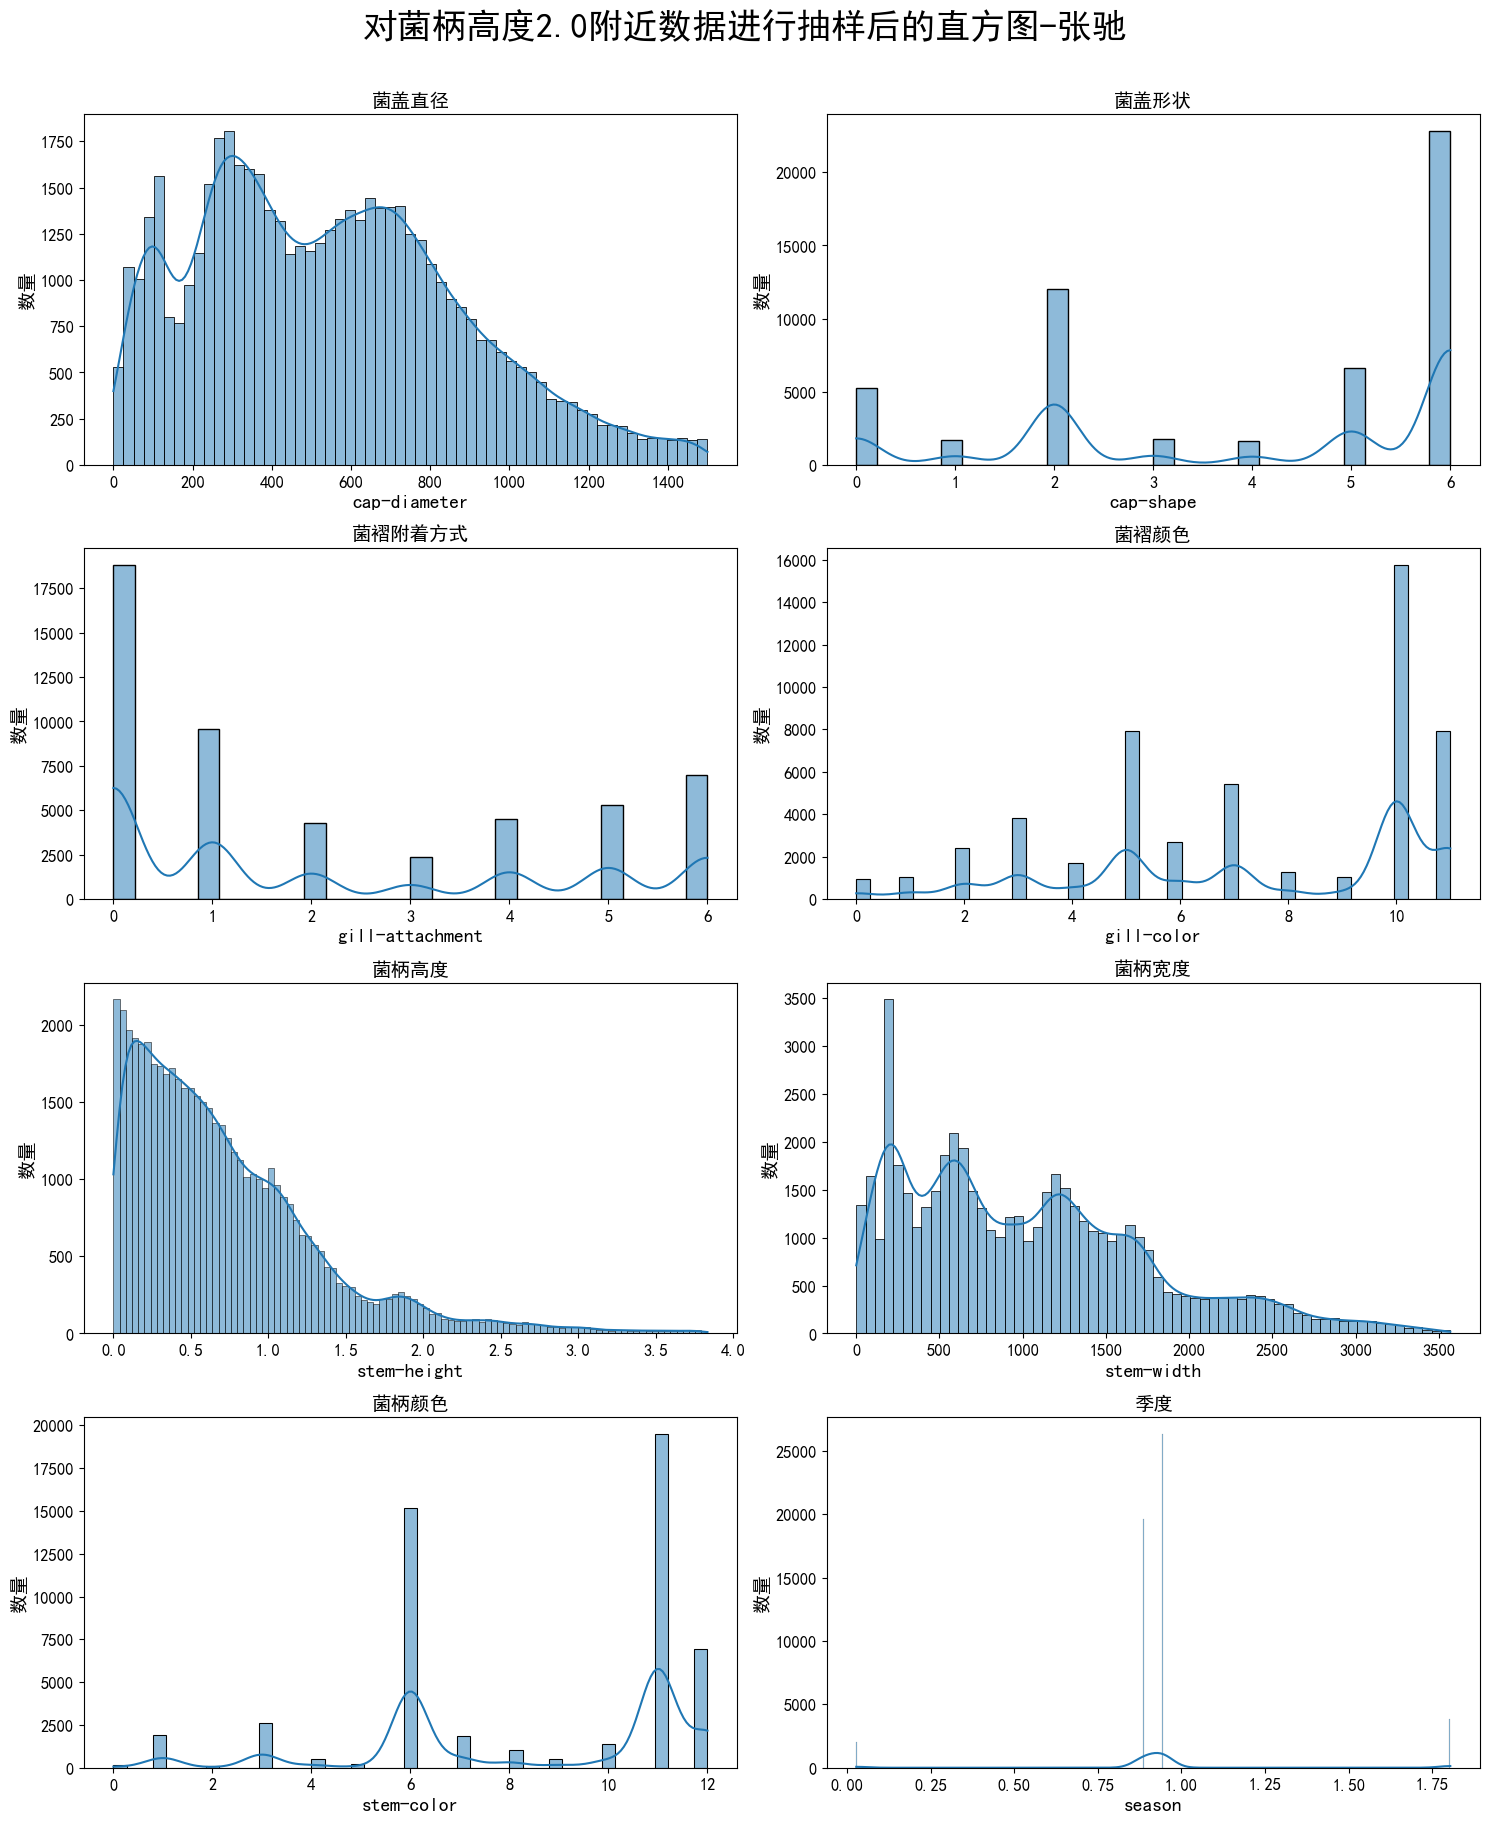

In [12]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
column_name = ['菌盖直径','菌盖形状','菌褶附着方式','菌褶颜色','菌柄高度','菌柄宽度','菌柄颜色','季度']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)  
    axs[i].set_title(column_name[i], fontsize=14, loc='center')  # 设置子图标题
    axs[i].set_ylabel('数量')  # 设置y轴标签

plt.suptitle("对菌柄高度2.0附近数据进行抽样后的直方图-张驰", fontsize=25, y=1.01)
plt.tight_layout()  
plt.show()

<div style="font-size:16px; line-height:1.5">
    可以看到抽样后菌柄高度总体上呈下降趋势，符合自然规律。<br>
</div>

<p style="font-size:18px; font-family:Courier New;">
    ③对处理完的数据进行检查
</p>

<div style="font-size:16px; line-height:1.5">
    首先，打印数据信息，查看一下数据处理之后剩余数据的各项基本信息。
</div>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51906 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     51906 non-null  int64  
 1   cap-shape        51906 non-null  int64  
 2   gill-attachment  51906 non-null  int64  
 3   gill-color       51906 non-null  int64  
 4   stem-height      51906 non-null  float64
 5   stem-width       51906 non-null  int64  
 6   stem-color       51906 non-null  int64  
 7   season           51906 non-null  float64
 8   class            51906 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 4.0 MB


<div style="font-size:16px; line-height:1.5">
    输出表示DataFrame有51906条非空条目，但是索引的范围是从0到54034。这是由于删除操作并没有重置索引造成的。<br>
    这一问题会对后续分层抽样造成影响，所以使用reset_index 方法来重置索引。
</div>

In [14]:
df = df.reset_index(drop=True)

<div style="font-size:16px; line-height:1.5">
    重置之后再次输出数据基本信息进行查看
</div>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51906 entries, 0 to 51905
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     51906 non-null  int64  
 1   cap-shape        51906 non-null  int64  
 2   gill-attachment  51906 non-null  int64  
 3   gill-color       51906 non-null  int64  
 4   stem-height      51906 non-null  float64
 5   stem-width       51906 non-null  int64  
 6   stem-color       51906 non-null  int64  
 7   season           51906 non-null  float64
 8   class            51906 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.6 MB


<div style="font-size:16px; line-height:1.5">
    索引已经重新更新。<br>
</div>

### 4、将数据集划分为训练集、测试集和验证集

<div style="font-size:16px; line-height:1.5">
    在经过上面对数据的处理后，这里开始对数据集进行划分，将数据集划分为训练集、测试件和验证集方便对数据进行训练。
</div>

<div style="font-size:16px; line-height:1.5">
    为了保证训练集、测试集和验证集同分布，这里采用分层抽样对原数据集进行处理。<br>
    同时，因为总的数据量有5万多份，数据较多。而根据上课时所学内容，当数据集数量较多的时候，可以不按照6:2:2或者7:2:1划分训练集、测试集和验证集，可以少分一些数据量给验证集和测试集，这样可以在节省计算资源的同时，得到比较可靠的模型性能评估。<br>
    我们这里将验证集和测试集各划分2000份，其他的数据留作训练集。
</div>

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

# 先划分出测试集
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=2000, stratify=y, random_state=42)

# 再从剩余数据中划分出验证集
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=2000, stratify=y_temp, random_state=42)

<div style="font-size:16px; line-height:1.5">
    将数据集划分为了训练集、测试集和验证集，并让他们保持同分布。<br>
    下面将划分的训练集、测试集和验证集分别输出为直方图，观察一下划分后的各数据集的情况。
</div>

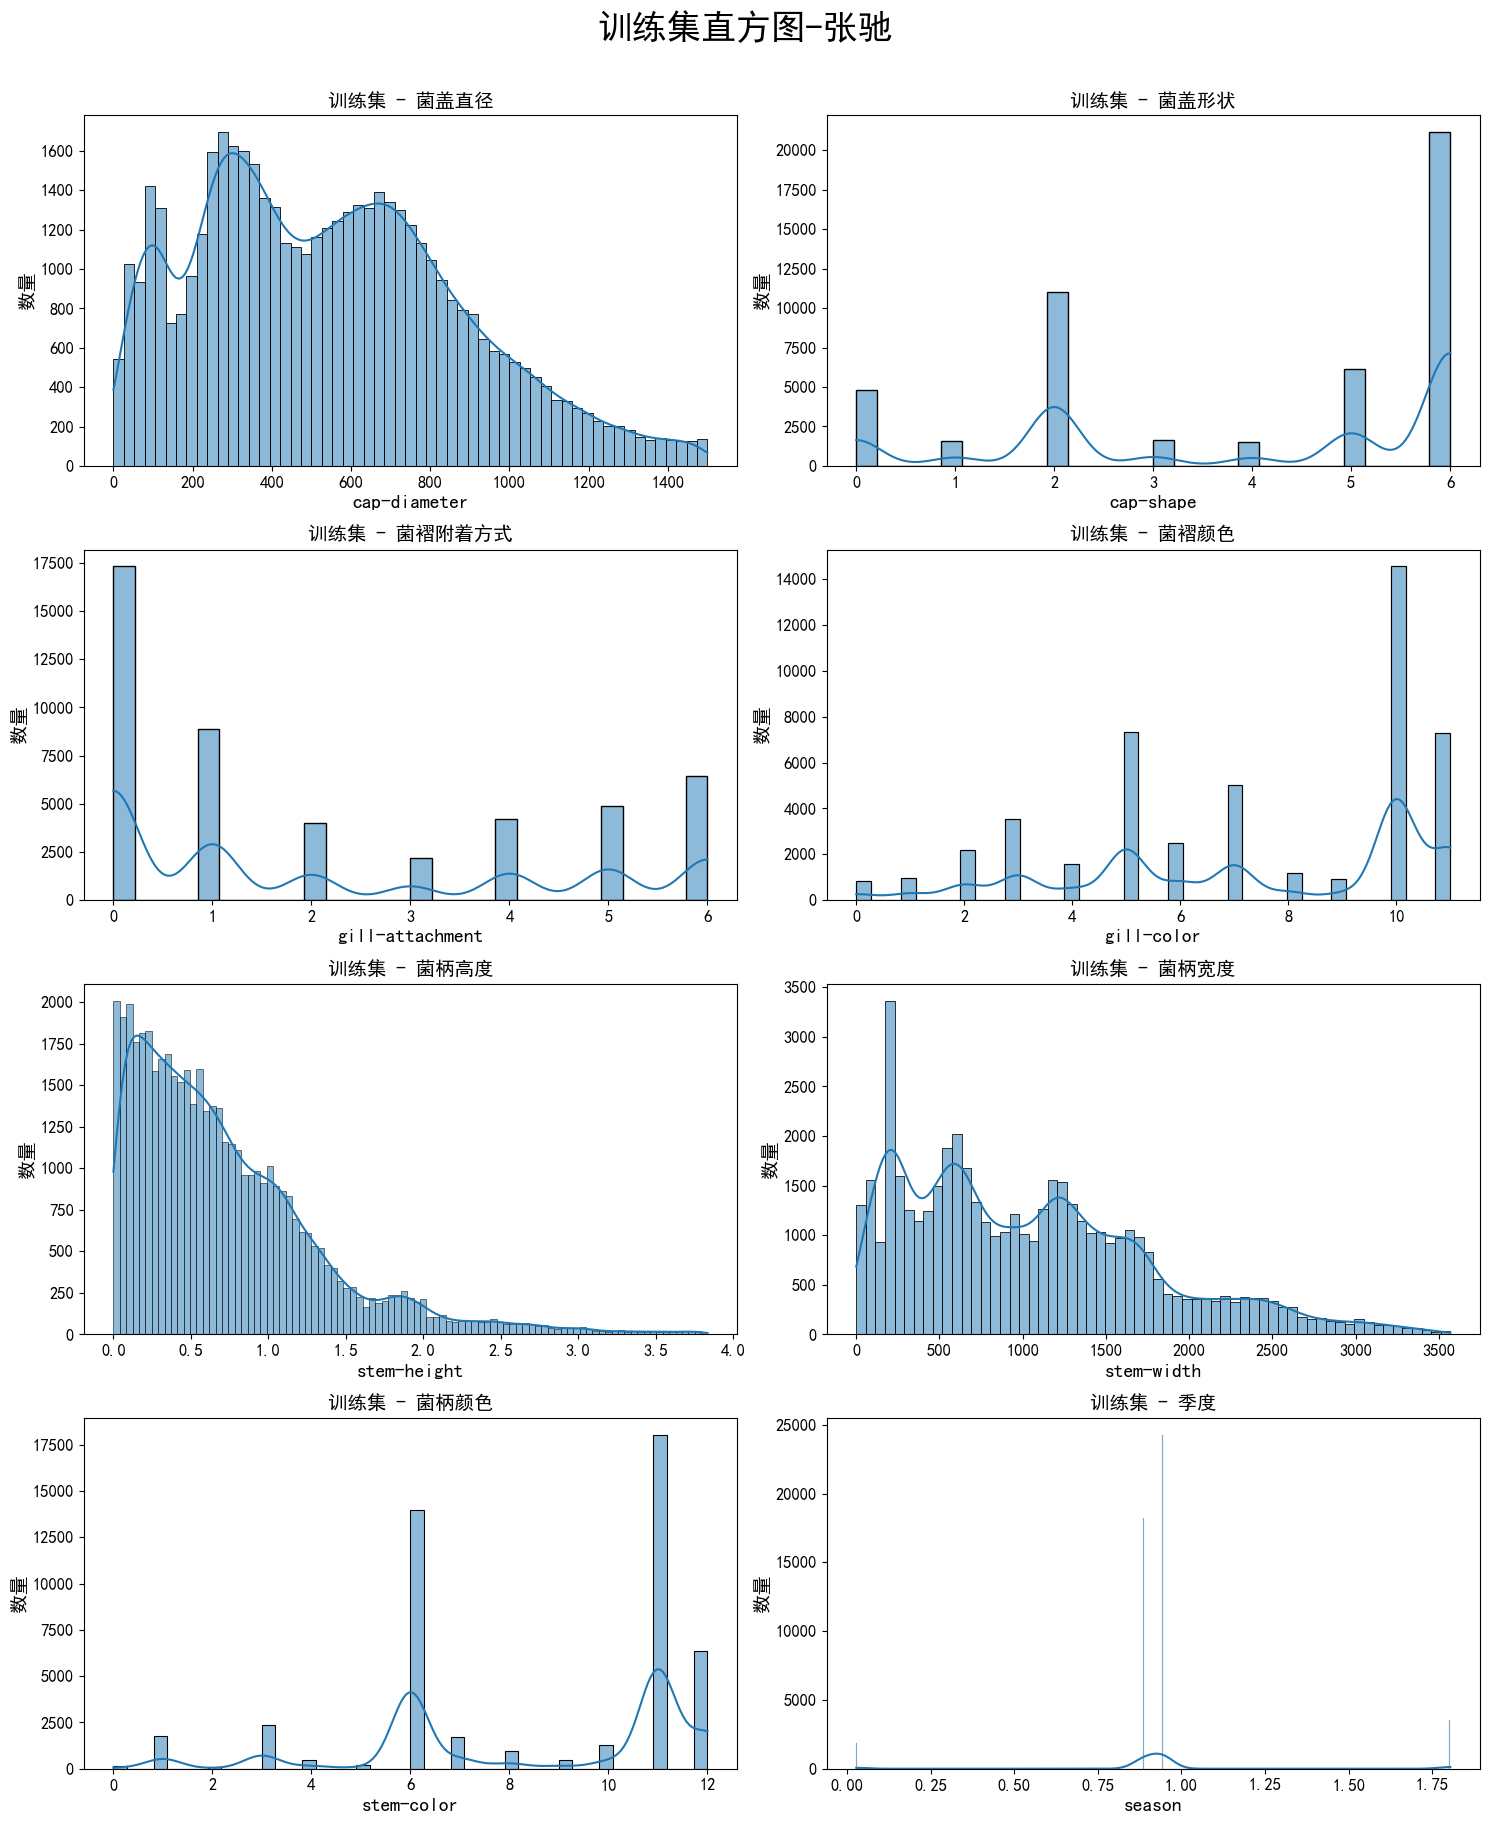

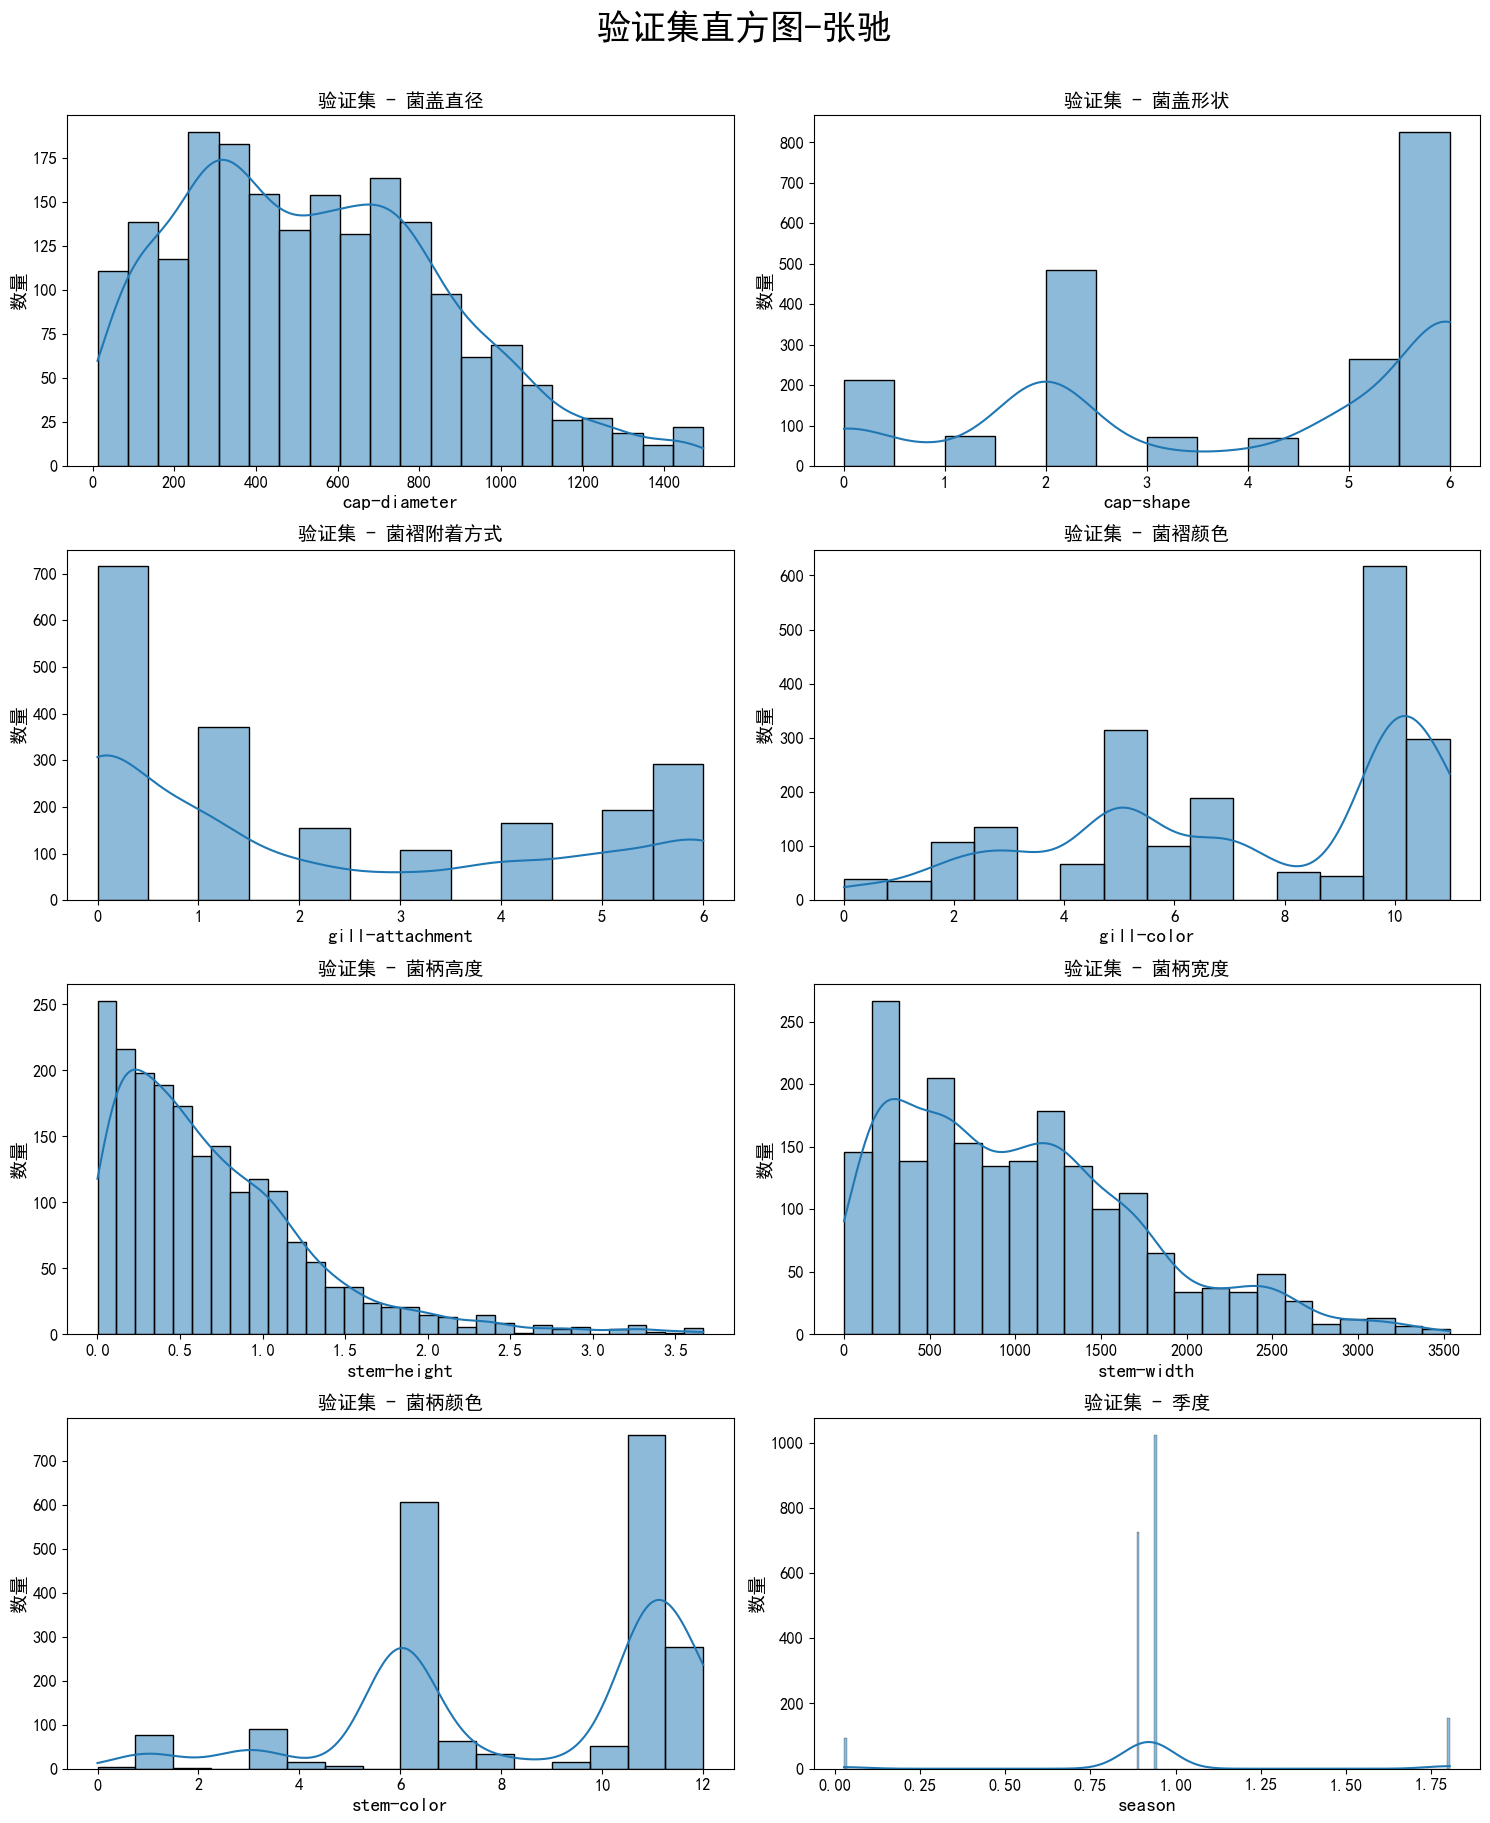

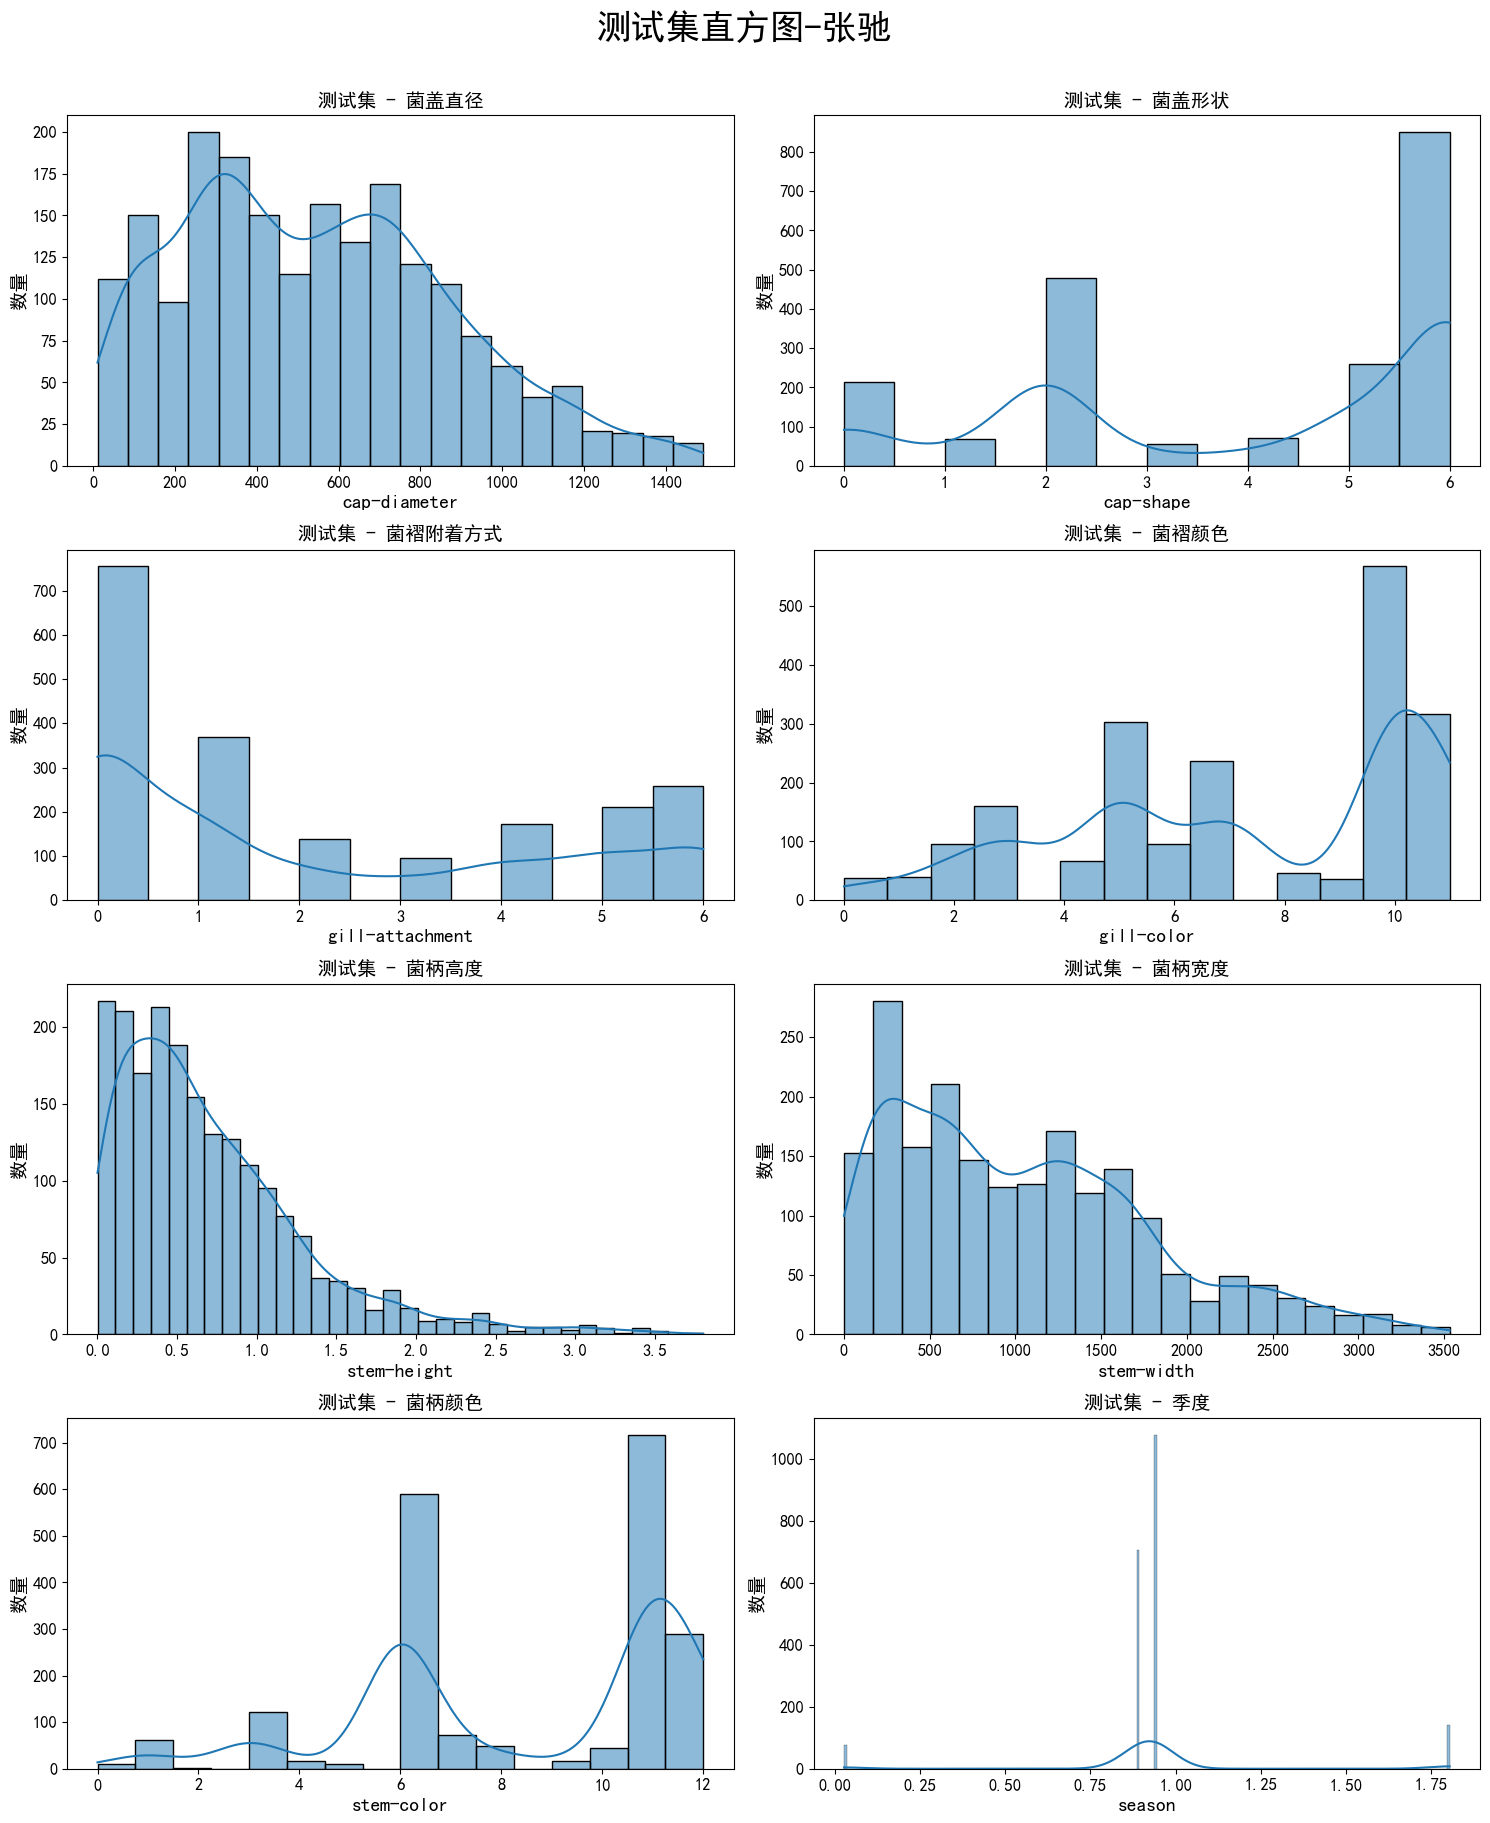

In [17]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
column_name = ['菌盖直径','菌盖形状','菌褶附着方式','菌褶颜色','菌柄高度','菌柄宽度','菌柄颜色','季度']

datasets = [(X_train, '训练集'), (X_val, '验证集'), (X_test, '测试集')]

for X, dataset_name in datasets:
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
    axs = axs.flatten()
    for i, column in enumerate(columns):
        sns.histplot(data=X, x=column, ax=axs[i], kde=True)  
        axs[i].set_title(f'{dataset_name} - {column_name[i]}', fontsize=14, loc='center')  # 设置子图标题
        axs[i].set_ylabel('数量')  # 设置y轴标签

    plt.suptitle(f"{dataset_name}直方图-张驰", fontsize=25, y=1.01)
    plt.tight_layout()  
    plt.show()

<div style="font-size:16px; line-height:1.5">
    上面分别输出了训练集、验证集和测试集的各个特征，分别对三者的特征进行对比，可以看到三者直方图在每一个特征上的核密度估计曲线走势基本相同，这表明三个数据集保持同分布，数据集被有效的进行了划分。
</div>

## 第二部分：模型训练

### 1、吴在彤

#### （1）逻辑回归

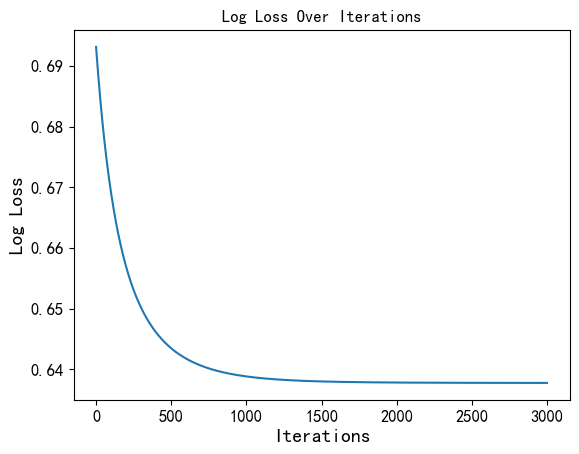

Accuracy: 0.638
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       917
           1       0.66      0.69      0.67      1083

    accuracy                           0.64      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.64      0.64      0.64      2000



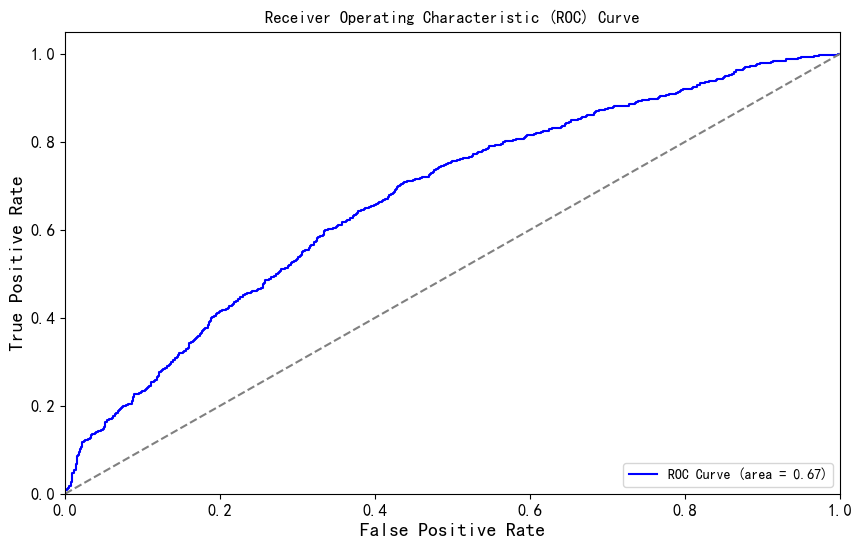

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化参数
m, n = X_train_scaled.shape
theta = np.zeros(n)
learning_rate = 0.01
num_iterations = 3000

# 添加截距项
X_train_scaled = np.hstack([np.ones((m, 1)), X_train_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])
theta = np.zeros(X_train_scaled.shape[1])

# 存储损失值
losses = []

# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

lambda_reg = 0.01  # 正则化参数

for i in range(num_iterations):
    z = np.dot(X_train_scaled, theta)
    h = sigmoid(z)
    loss = log_loss(y_train, h) + lambda_reg * np.sum(theta**2) / (2 * m)
    losses.append(loss)
    
    # 计算梯度并添加正则化项
    gradient = (np.dot(X_train_scaled.T, (h - y_train)) + lambda_reg * theta) / m
    theta -= learning_rate * gradient

# 可视化损失函数变化
plt.plot(range(num_iterations), losses)
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Iterations')
plt.show()

# 模型预测
z_test = np.dot(X_test_scaled, theta)
y_pred_proba = sigmoid(z_test)
y_pred = (y_pred_proba >= 0.5).astype(int)

# 模型评估
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 绘制 ROC 曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<font size=3>由损失函数图可以看出，在3000次迭代训练之后，模型已经收敛，但是模型准确率为0.638，AUC为0.67，模型的表现并不理想。</font>

#### （2）支持向量机

<font size=3>为了减少模型的训练时间并保持一定的训练效果，现从已经处理后的数据中选出一小部分数据进行模型的训练。</font>

In [19]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
random_list = np.random.randint(0,50000,5000)

df_little = df.iloc[random_list,:]

X_little = df_little.drop('class', axis=1)
y_little = df_little['class']

# 先划分出训练集和测试集
X_train_little, X_test_little, y_train_little, y_test_little = train_test_split(X_little, y_little, test_size=0.2, stratify=y_little, random_state=42)

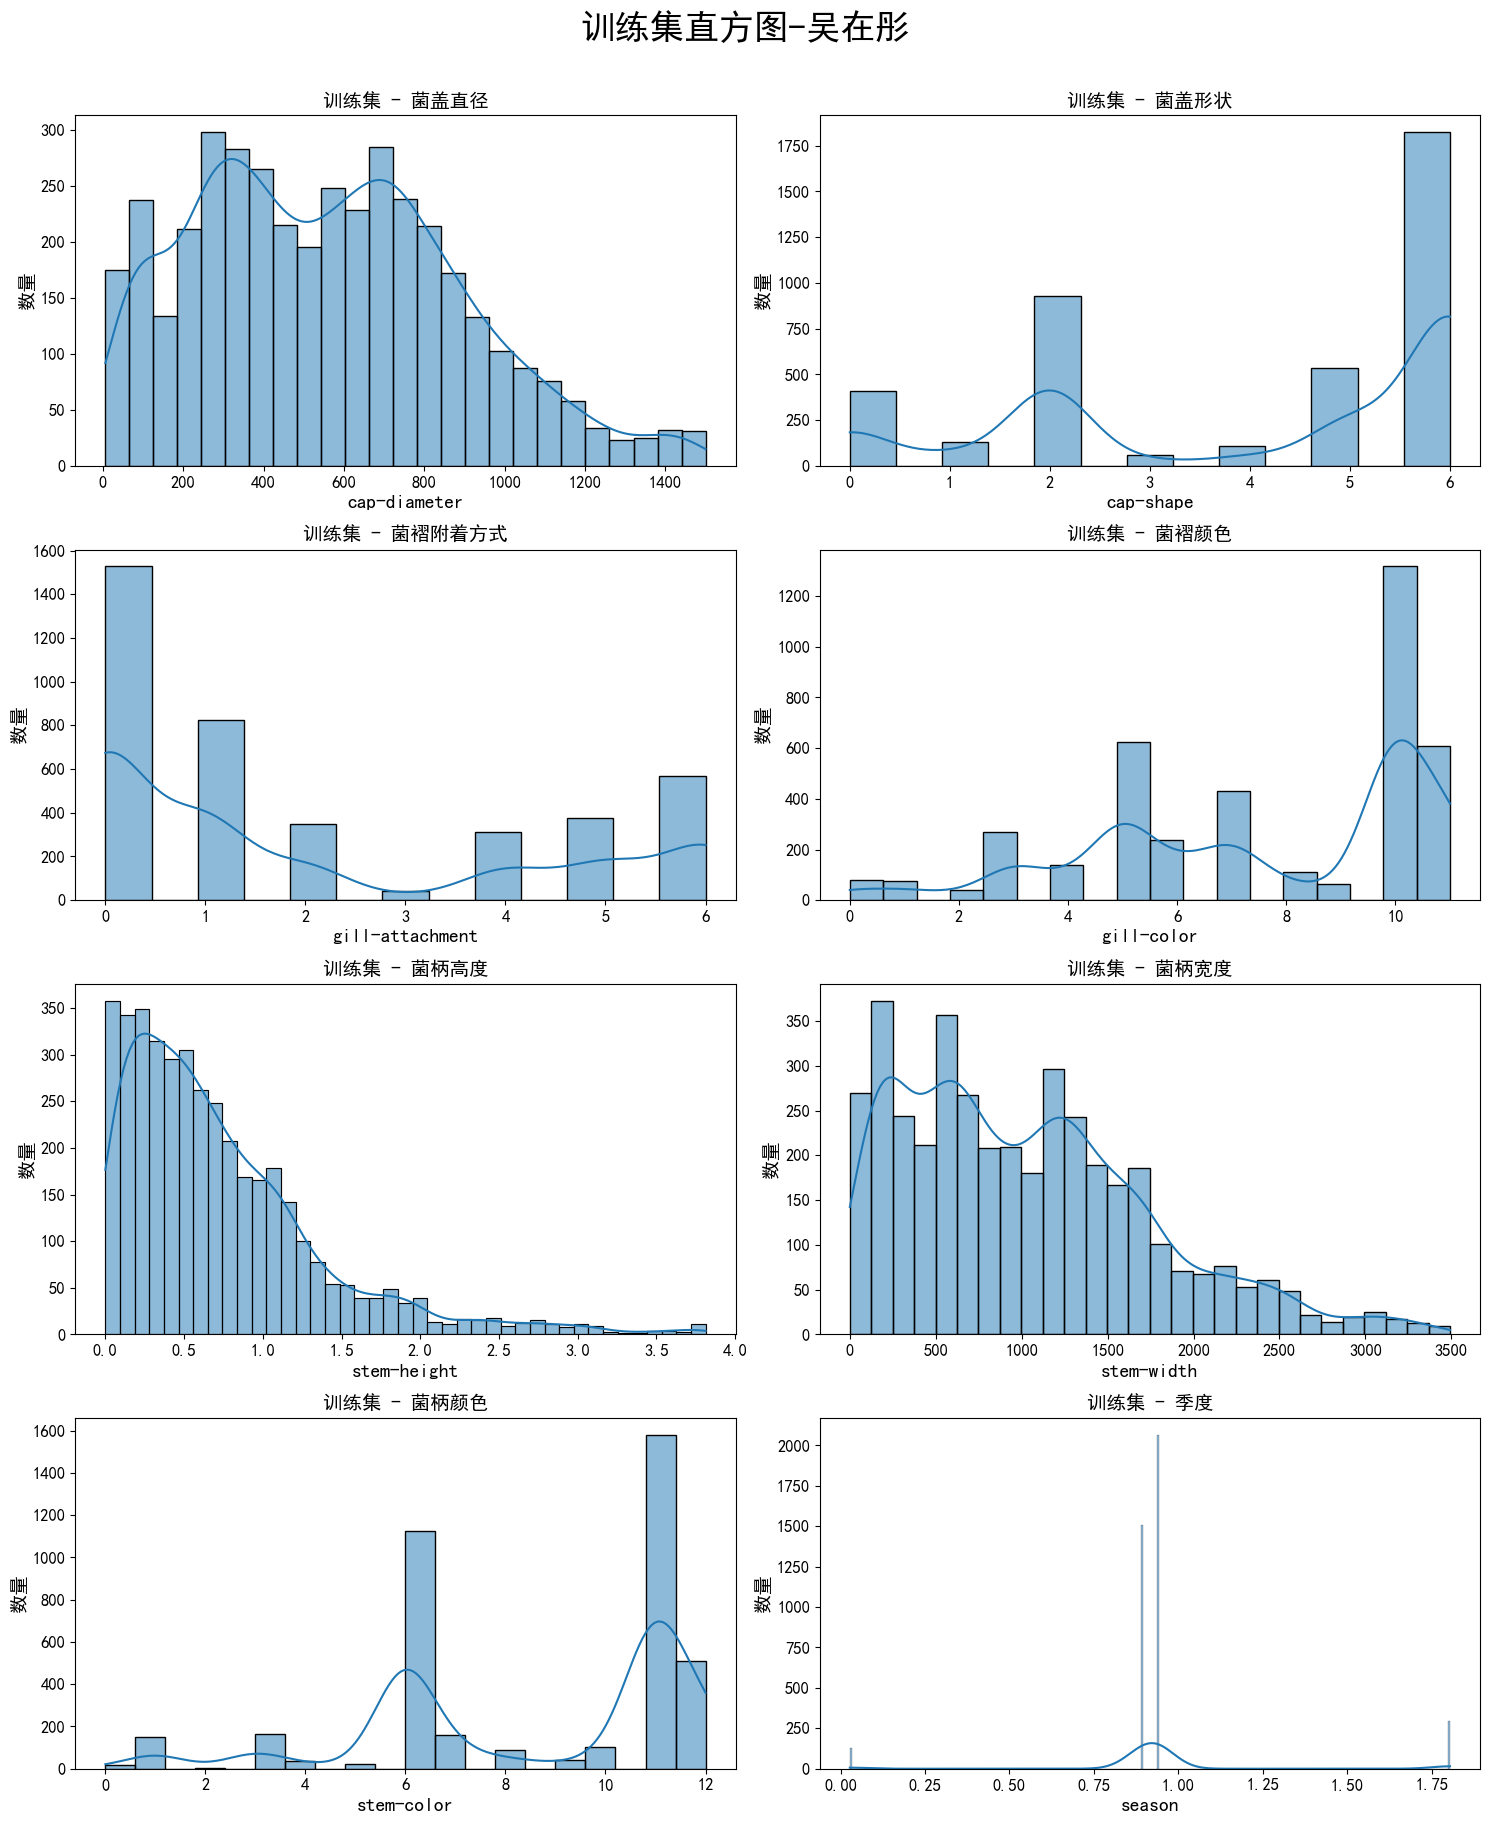

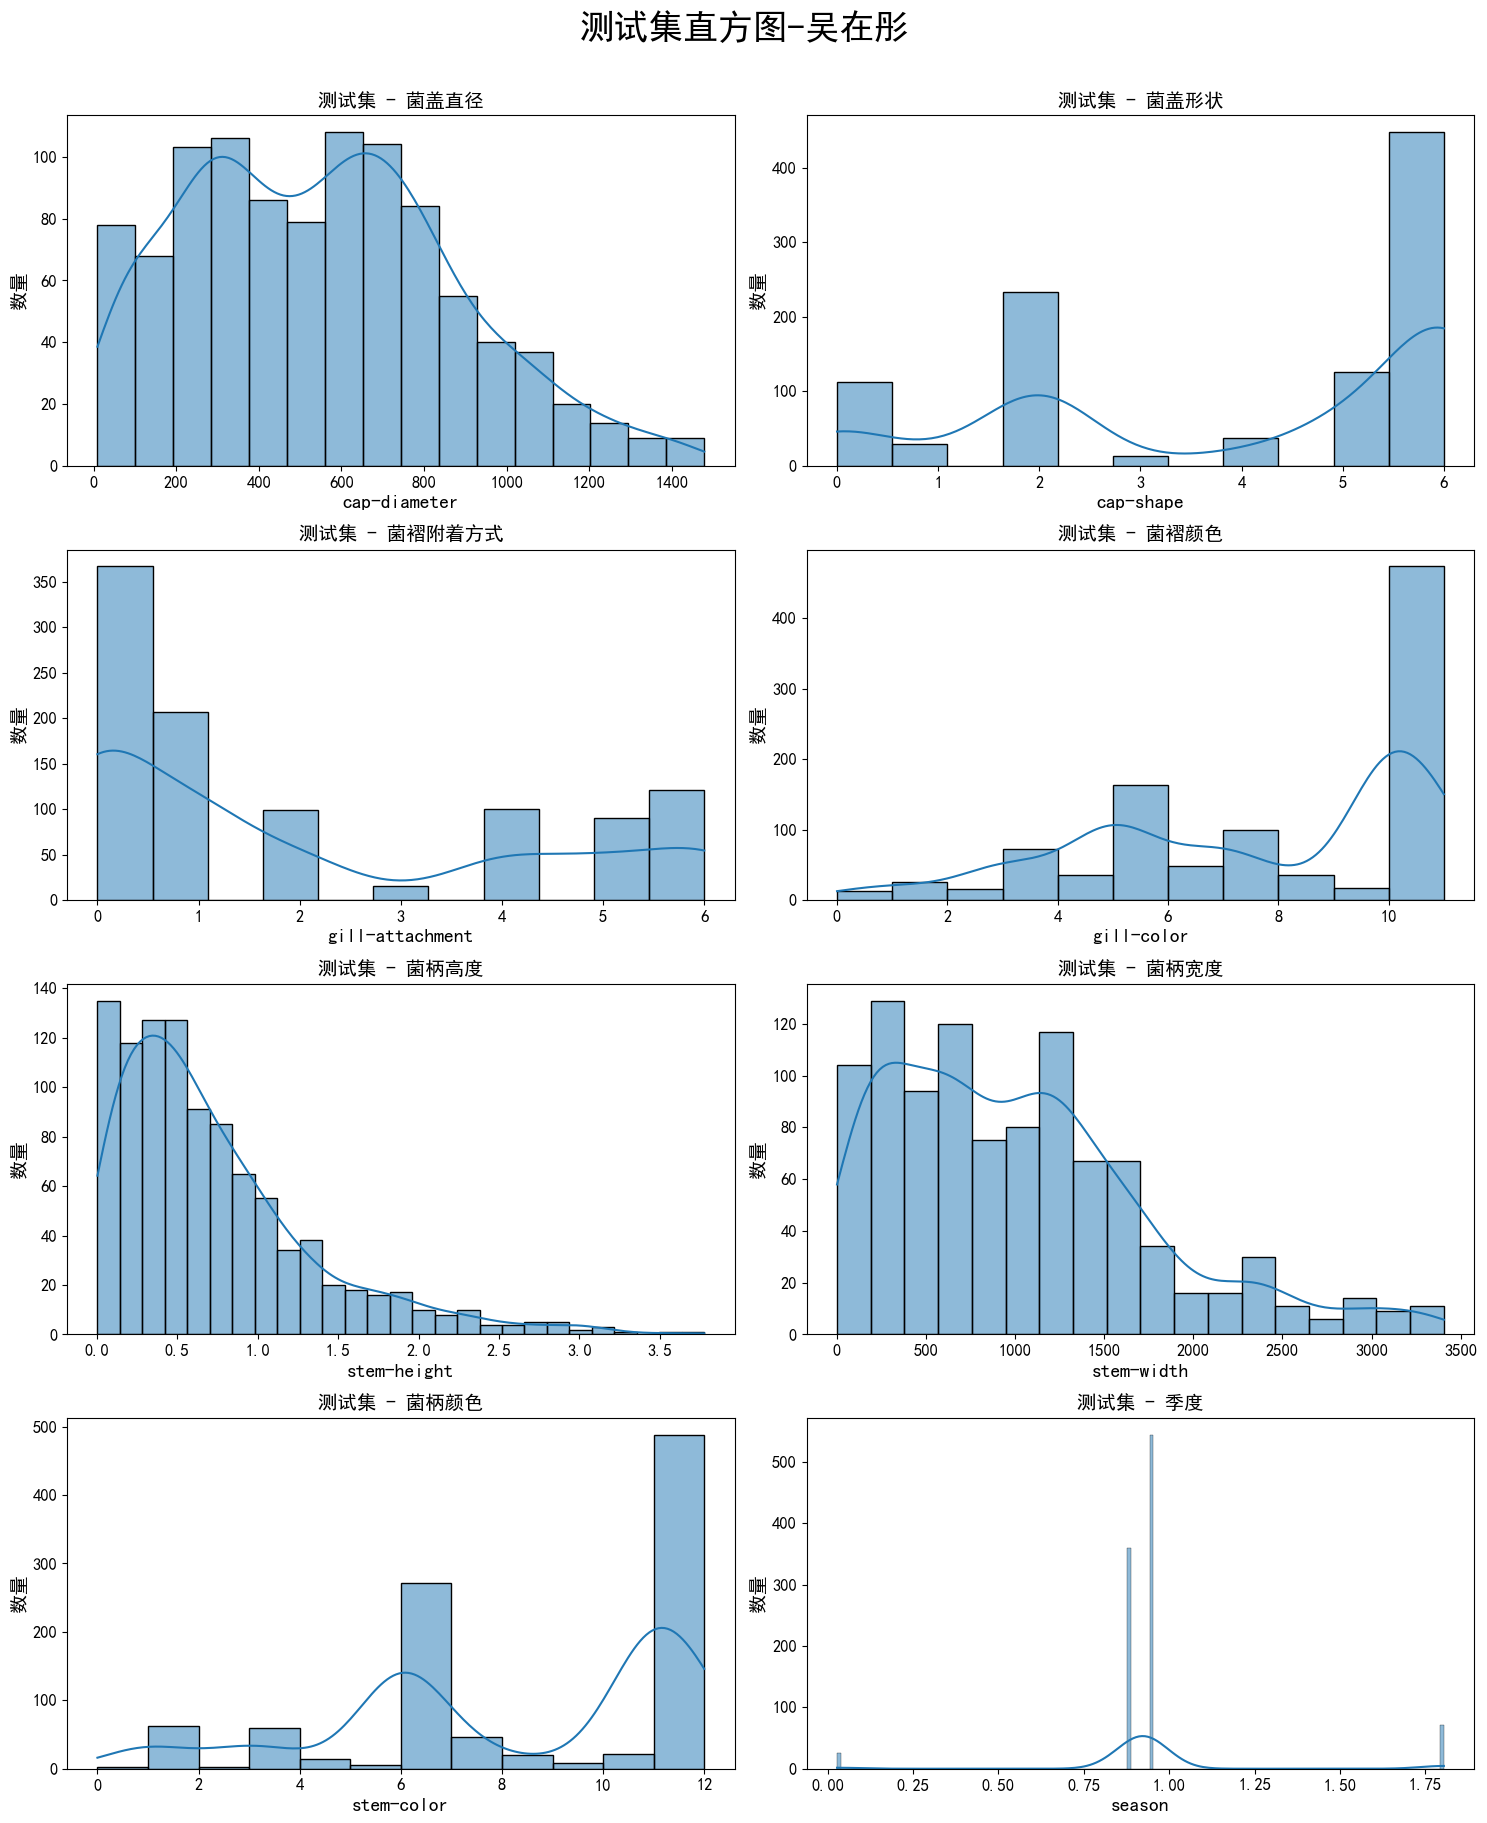

In [20]:
columns_w = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
column_name_w = ['菌盖直径','菌盖形状','菌褶附着方式','菌褶颜色','菌柄高度','菌柄宽度','菌柄颜色','季度']

datasets_w = [(X_train_little, '训练集'),(X_test_little, '测试集')]

for X, dataset_name in datasets_w:
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
    axs = axs.flatten()
    for i, column in enumerate(columns):
        sns.histplot(data=X, x=column, ax=axs[i], kde=True)  
        axs[i].set_title(f'{dataset_name} - {column_name[i]}', fontsize=14, loc='center')  # 设置子图标题
        axs[i].set_ylabel('数量')  # 设置y轴标签

    plt.suptitle(f"{dataset_name}直方图-吴在彤", fontsize=25, y=1.01)
    plt.tight_layout()  
    plt.show()

<font size=3>上面分别输出了训练集和测试集的各个特征，分别对二者的特征进行对比，可以看到二者直方图在每一个特征上的核密度估计曲线走势基本相同，这表明两个数据集保持同分布，数据集被有效的进行了划分。</font>

Best Parameters: {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.903
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.91      0.90      0.91       530

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



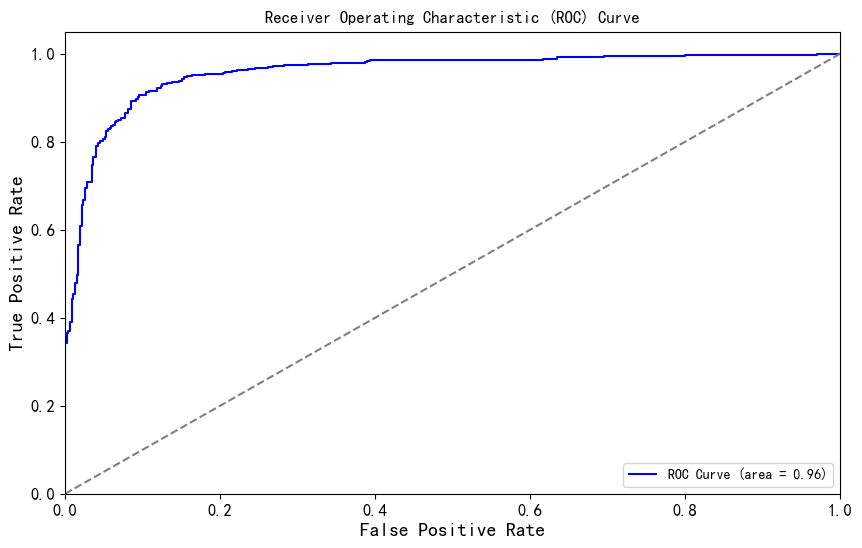

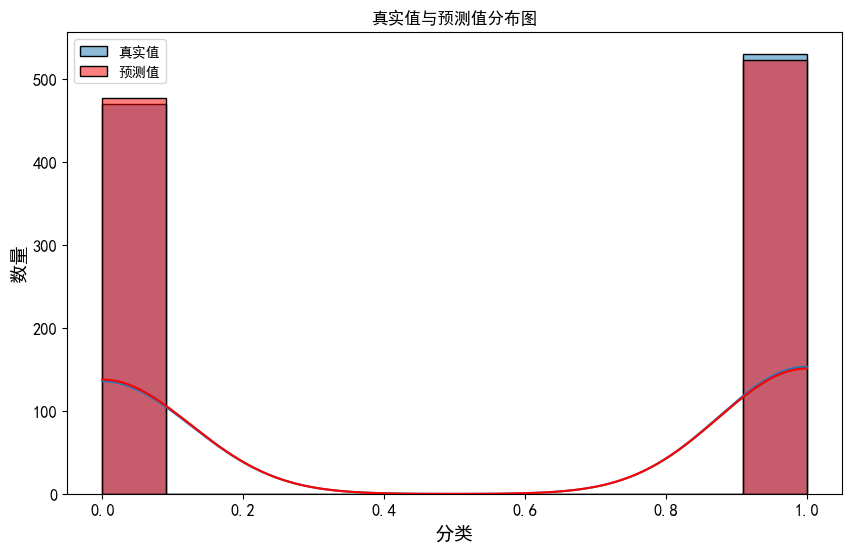

In [21]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 特征缩放
scaler = StandardScaler()
X_train_little = scaler.fit_transform(X_train_little)
X_test_little = scaler.transform(X_test_little)


# 初始化支持向量分类器
svc = SVC(probability=True)  # 设置 probability=True 以便计算 ROC 曲线

# 定义参数网格
params = {
    'C': [0.01, 0.1, 0.5, 1, 3, 5, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

# 初始化 GridSearchCV
gsc = GridSearchCV(estimator=svc, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5)

# 在训练集上进行网格搜索
gsc.fit(X_train_little, y_train_little)

# 输出最佳参数
print("Best Parameters:", gsc.best_params_)

# 使用最佳参数进行预测
y_pred = gsc.predict(X_test_little)
y_pred_proba = gsc.predict_proba(X_test_little)[:, 1]  # 获取预测概率

# 模型评估
accuracy = accuracy_score(y_test_little, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_little, y_pred))

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test_little, y_pred_proba)
roc_auc = roc_auc_score(y_test_little, y_pred_proba)

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 可视化真实值与预测值的分布
plt.figure(figsize=(10, 6))
sns.histplot(data=y_test_little, kde=True, label='真实值')
sns.histplot(data=y_pred, color='red', kde=True, label='预测值')
plt.title('真实值与预测值分布图')
plt.xlabel('分类')
plt.ylabel('数量')
plt.legend()
plt.show()
plt.show()


<font size=3>模型准确率为0.903，AUC为0.96，模型的性能良好。</font>

### 2、张驰

### 3、吴硕

### 4、胡浩鸿

### 5、苏昱铭

### 6、祁子涵